In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Make plots appear in the notebook
%matplotlib inline

# Load the dataset from the data/ folder
data_path = "../data/resume_data.csv" 
df = pd.read_csv(data_path)

# Inspect the first few rows
df.head()

,ID,Resume_str,Resume_html,Category
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR


In [3]:
# Check the shape of the dataset
print("Dataset shape:", df.shape)
print("")

# Show column names and data types
df.info()
print("")

# Check basic descriptive stats (numerical columns only)
df.describe()
print("")

# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

#Number of unique values in each category column
print("Unique values per column:")
print(df['Category'].nunique())
print(df['Category'].unique())

Dataset shape: (2484, 4)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2484 entries, 0 to 2483
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           2484 non-null   int64 
 1   Resume_str   2484 non-null   object
 2   Resume_html  2484 non-null   object
 3   Category     2484 non-null   object
dtypes: int64(1), object(3)
memory usage: 77.8+ KB


Missing values per column:
ID             0
Resume_str     0
Resume_html    0
Category       0
dtype: int64
Unique values per column:
24
['HR' 'DESIGNER' 'INFORMATION-TECHNOLOGY' 'TEACHER' 'ADVOCATE'
 'BUSINESS-DEVELOPMENT' 'HEALTHCARE' 'FITNESS' 'AGRICULTURE' 'BPO' 'SALES'
 'CONSULTANT' 'DIGITAL-MEDIA' 'AUTOMOBILE' 'CHEF' 'FINANCE' 'APPAREL'
 'ENGINEERING' 'ACCOUNTANT' 'CONSTRUCTION' 'PUBLIC-RELATIONS' 'BANKING'
 'ARTS' 'AVIATION']


Category
INFORMATION-TECHNOLOGY    120
BUSINESS-DEVELOPMENT      120
FINANCE                   118
ADVOCATE                  118
ACCOUNTANT                118
ENGINEERING               118
CHEF                      118
AVIATION                  117
FITNESS                   117
SALES                     116
BANKING                   115
HEALTHCARE                115
CONSULTANT                115
CONSTRUCTION              112
PUBLIC-RELATIONS          111
HR                        110
DESIGNER                  107
ARTS                      103
TEACHER                   102
APPAREL                    97
DIGITAL-MEDIA              96
AGRICULTURE                63
AUTOMOBILE                 36
BPO                        22
Name: count, dtype: int64


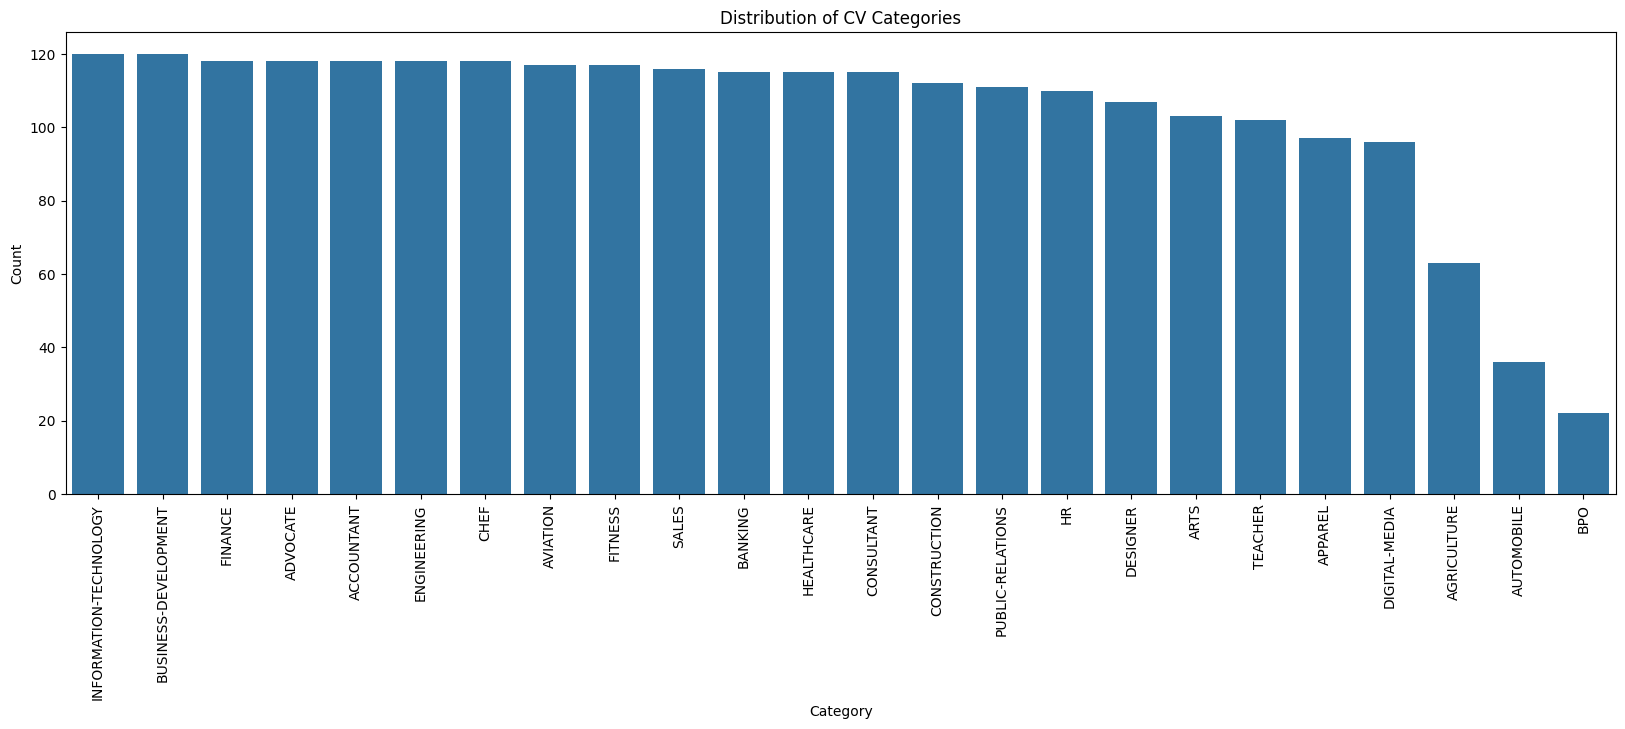

In [4]:
# Count how many resumes per category
category_counts = df["Category"].value_counts()
print(category_counts)

# Quick bar plot of category distribution
plt.figure(figsize=(20, 6))
sns.barplot(x=category_counts.index, y=category_counts.values)
plt.xticks(rotation=90)
plt.title("Distribution of CV Categories")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()


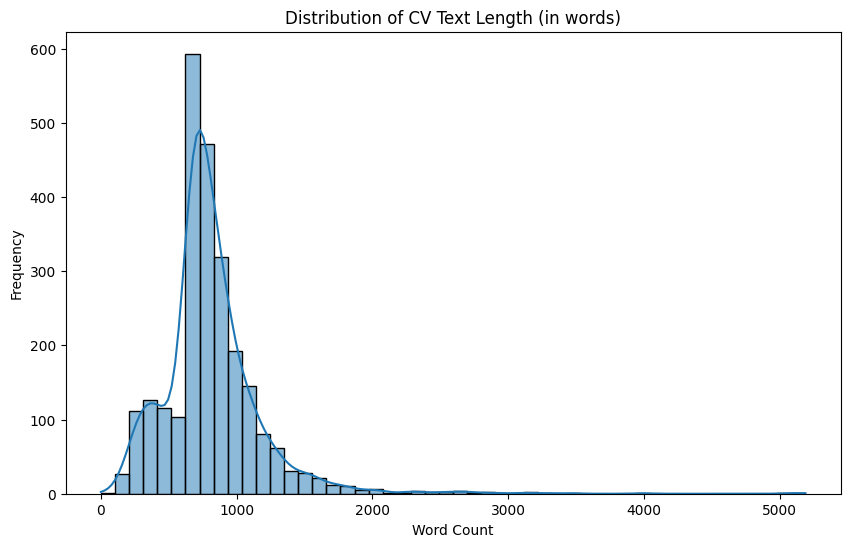

count    2484.000000
mean      811.325282
std       371.007491
min         0.000000
25%       651.000000
50%       757.000000
75%       933.000000
max      5190.000000
Name: resume_length, dtype: float64

In [5]:
# Calculate the length of each CV in terms of word count
df["resume_length"] = df["Resume_str"].apply(lambda x: len(str(x).split()))

# Plot the distribution of CV text lengths
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="resume_length", bins=50, kde=True)
plt.title("Distribution of CV Text Length (in words)")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.show()

# Display descriptive statistics about the CV lengths
df["resume_length"].describe()

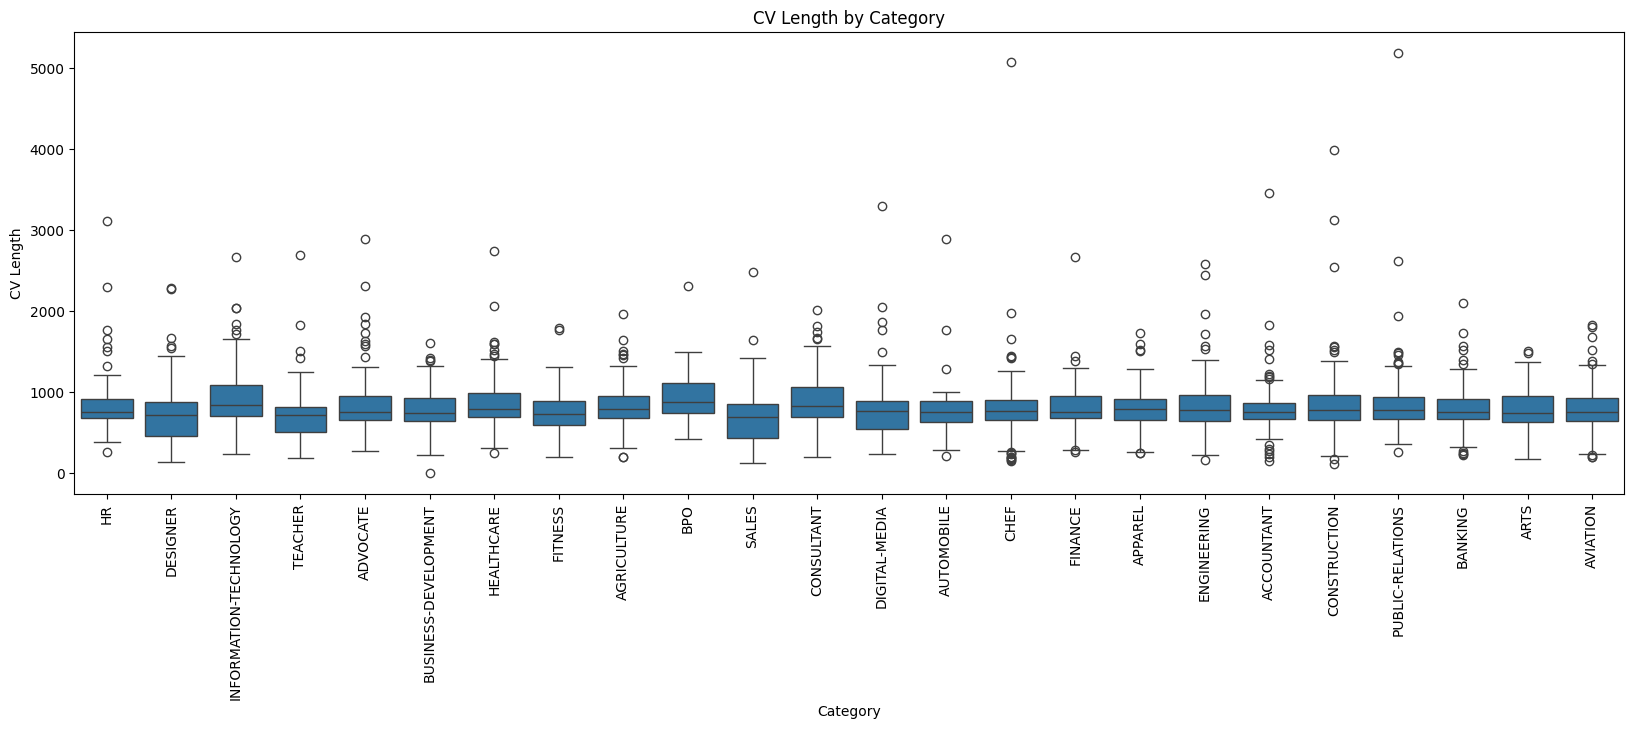

In [6]:
# Plot a boxplot to show the distribution of CV lengths by category
plt.figure(figsize=(20, 6))
sns.boxplot(x='Category', y='resume_length', data=df)
plt.xlabel('Category')
plt.ylabel('CV Length')
plt.title('CV Length by Category')
plt.xticks(rotation=90)
plt.show()


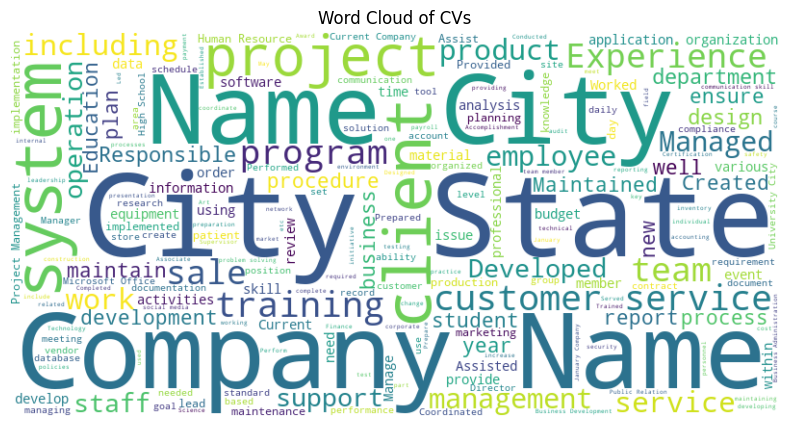

In [7]:
# Import the WordCloud module
from wordcloud import WordCloud

# Combine all cv texts into a single string
text = ' '.join(df['Resume_str'])

# Generate a word cloud image
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axes
plt.title('Word Cloud of CVs')
plt.show()

In [8]:
import spacy

# Load the spaCy English model
nlp = spacy.load("en_core_web_sm")

# Add custom stop words (Discovered from the word cloud)
custom_stop_words = {"city", "state", "name", "company", "summary", "include"}
for word in custom_stop_words:
    nlp.Defaults.stop_words.add(word)
    nlp.vocab[word].is_stop = True

# tokenize + lemmatize text
def preprocess_text(text):
    """
    Simple example: convert to doc, remove punctuation & stop words, and lemmatize tokens.
    """
    doc = nlp(text.lower())
    tokens = [token.lemma_ for token in doc if not token.is_punct and not token.is_stop and len(token.text.strip()) > 2]
    return " ".join(tokens)

# Apply the preprocess_text function to the entire dataframe
df["processed_resume"] = df["Resume_str"].apply(preprocess_text)

# Display the first few rows of the dataframe to verify the changes
df[["Resume_str", "processed_resume"]].head()


,Resume_str,processed_resume
0,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,administrator marketing associate administrato...
1,"HR SPECIALIST, US HR OPERATIONS ...",specialist operation versatile medium professi...
2,HR DIRECTOR Summary Over 2...,director year experience recruiting plus year ...
3,HR SPECIALIST Summary Dedica...,specialist dedicate driven dynamic year custom...
4,HR MANAGER Skill Highlights ...,manager skill highlight skill department start...


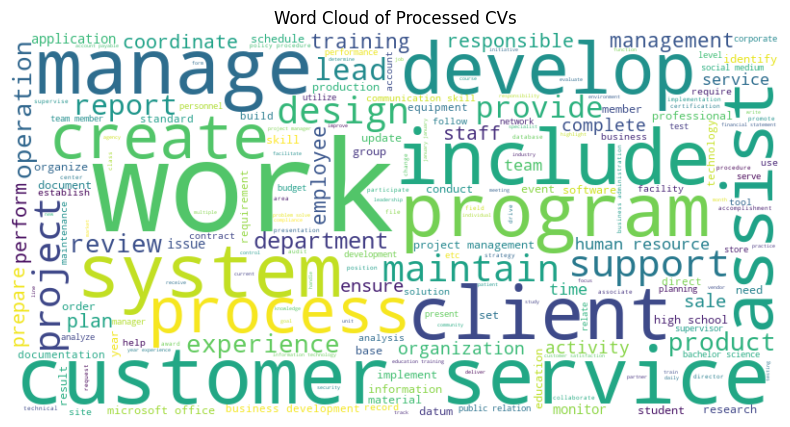

In [9]:
# Combine all processed resume texts into a single string
processed_text = ' '.join(df['processed_resume'])

# Generate a word cloud image from the processed text
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(processed_text)

# Display the word cloud image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axes
plt.title('Word Cloud of Processed CVs')
plt.show()


# Category-wise Word Frequency

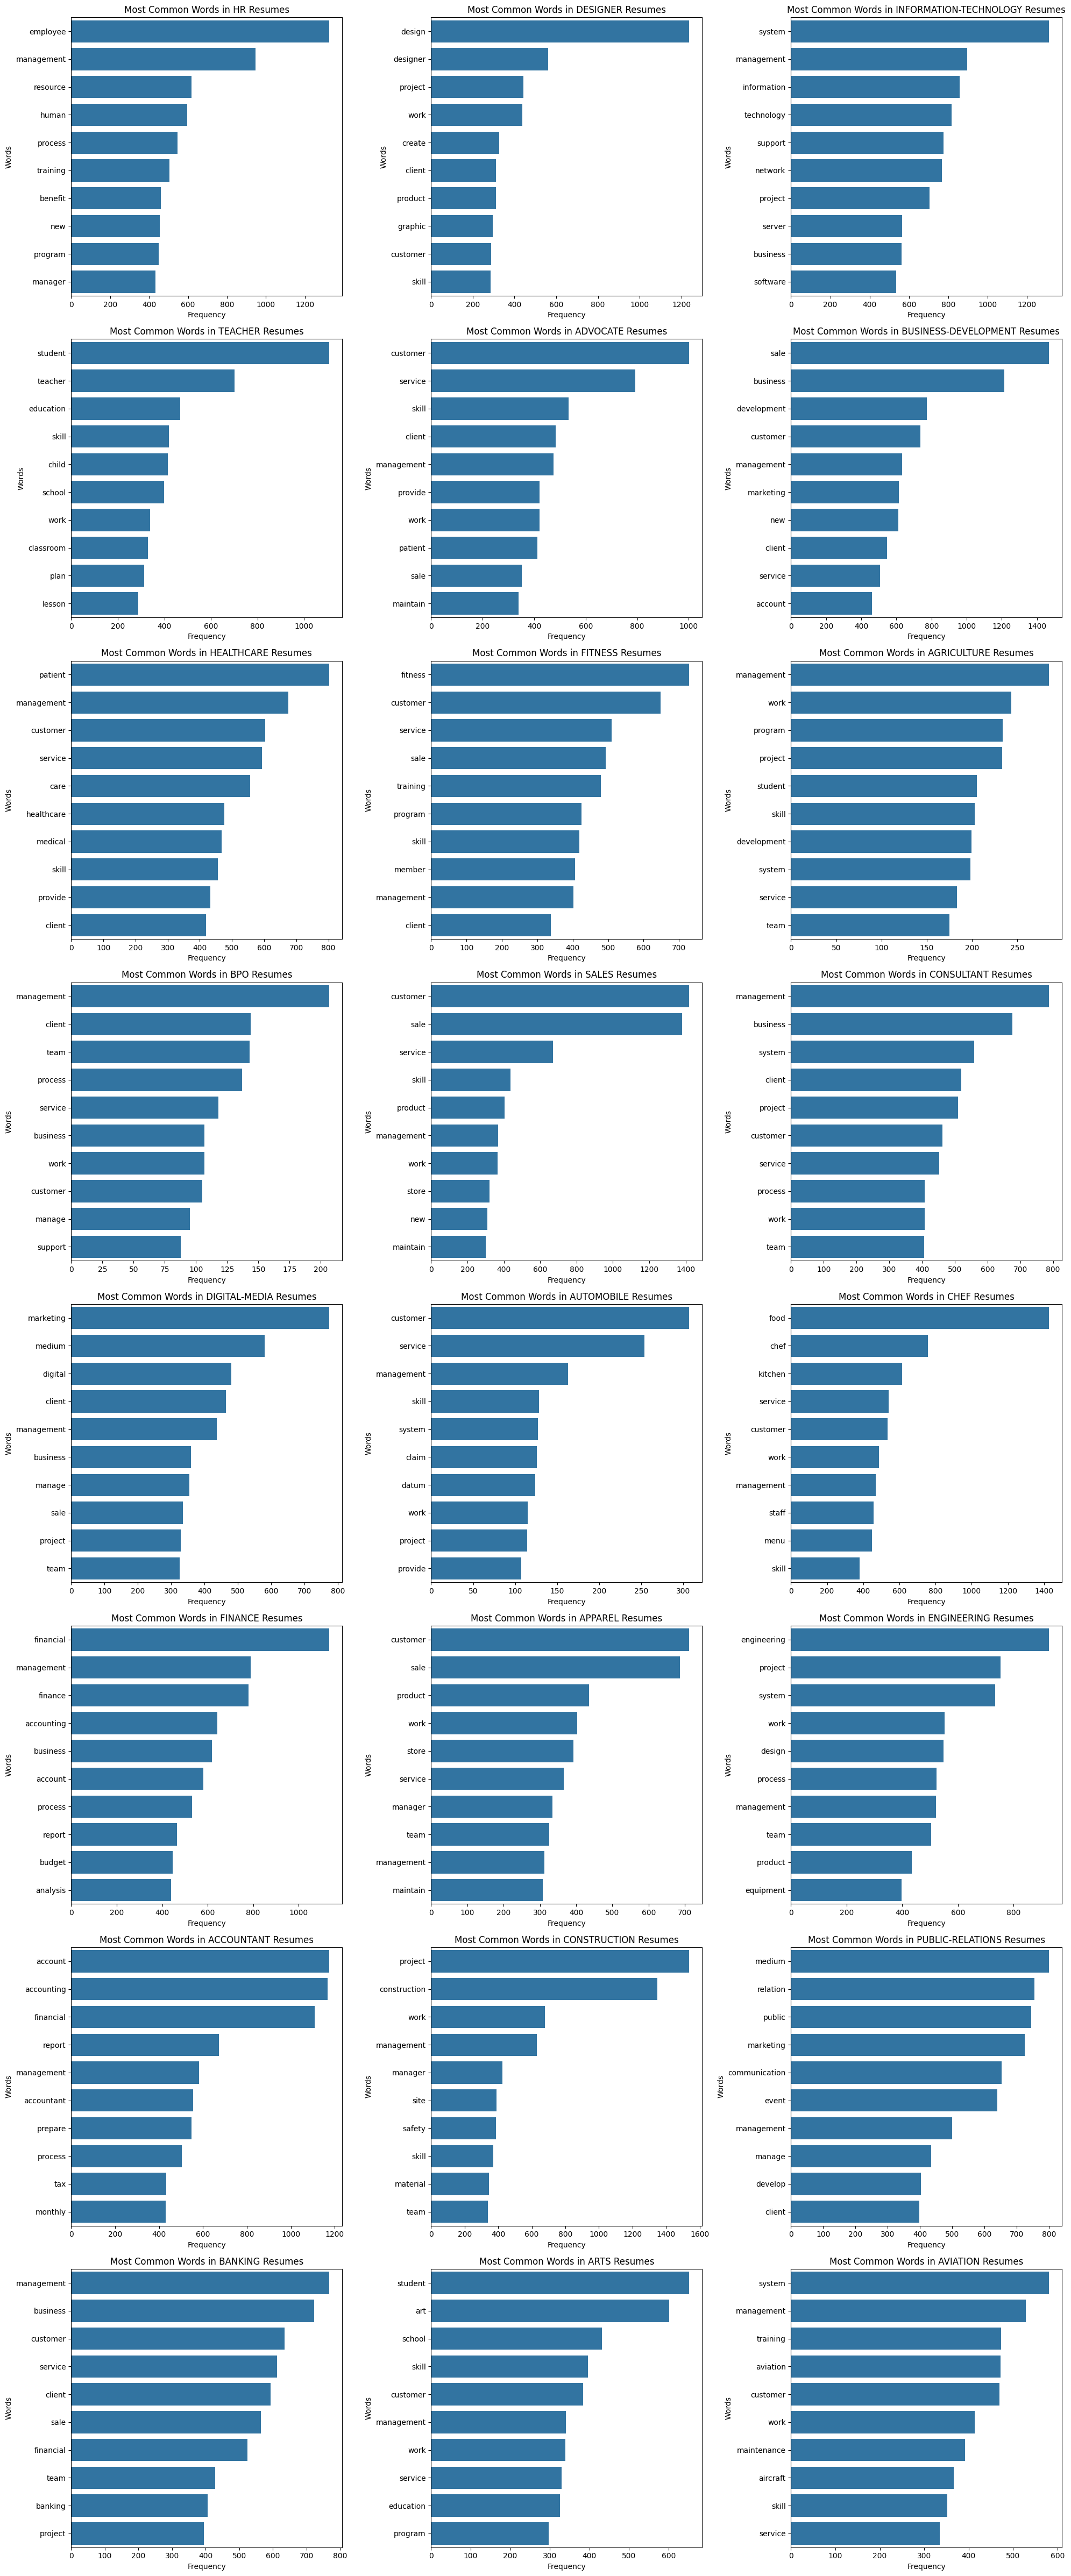

In [10]:
from collections import Counter

# Count the frequency of each word for each category
category_word_counts = {}
for category in df['Category'].unique():
    category_text = ' '.join(df[df['Category'] == category]['processed_resume'])
    tokens = category_text.split()
    category_word_counts[category] = Counter(tokens)

# Plot the most common words for each category using a grid of bar plots
num_categories = len(category_word_counts)
num_cols = 3
num_rows = (num_categories + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 6))
axes = axes.flatten()

for i, (category, word_count) in enumerate(category_word_counts.items()):
    common_words = word_count.most_common(10)
    words, counts = zip(*common_words)
    
    sns.barplot(x=list(counts), y=list(words), ax=axes[i])
    axes[i].set_title(f"Most Common Words in {category} Resumes")
    axes[i].set_xlabel("Frequency")
    axes[i].set_ylabel("Words")

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()
